In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
X_train = pd.read_csv("cleanData_CV/X_train.csv")
X_test = pd.read_csv("cleanData_CV/X_test.csv")
y_train = pd.read_csv("cleanData_CV/y_train.csv", header = None)
y_test = pd.read_csv("cleanData_CV/y_test.csv", header = None)
y_train = y_train[0]
y_test = y_test[0]

In [3]:
# Define error measure for official scoring : RMSE
#def rmse(y_train, y_train_pred):
#    return(np.sqrt(mean_squared_error(y_train, y_train_pred)))

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 0.133678467106
RMSE on Test set : 0.134941585876


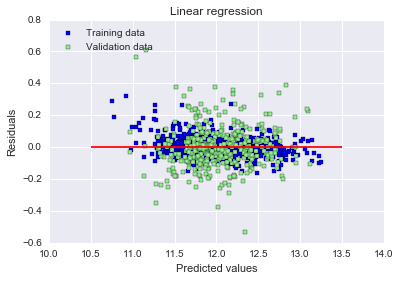

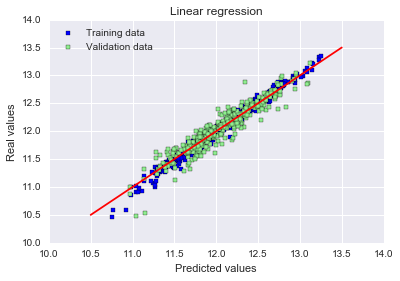

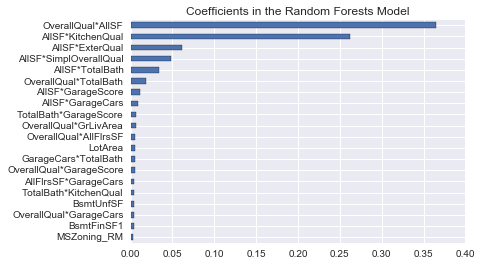

In [4]:
# Random Forests
forest = RandomForestRegressor(n_estimators = 3000, 
                               random_state = randomState, 
                               n_jobs = njobs)
forest.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(forest).mean())
print("RMSE on Test set :", rmse_cv_test(forest).mean())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(forest.feature_importances_, index = X_train.columns)
imp_coefs = coefs.sort_values().tail(20)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forests Model")
plt.figure(figsize=(10, 5))

In [5]:
# Write predictions in CSV file
now = datetime.datetime.now()
forest_name = "preds/forest_CV_" + str(now.strftime("%Y-%m-%d-%H-%M")) + ".csv"
preds = pd.DataFrame({"SalePrice": np.expm1(forest.predict(X_test))}, columns = ["SalePrice"])
preds.to_csv(forest_name, index = False)

In [6]:
'''# Plotting scores against n_estimators
nEstimators = [30, 100, 300, 1000, 3000, 10000]
train_scores = []
test_scores = []
for x in nEstimators:
    print("x = " + str(x))
    forest = RandomForestRegressor(n_estimators = x, 
                                   random_state = randomState, 
                                   n_jobs = njobs)
    forest.fit(X_train, y_train)
    train_score = rmse_cv_train(forest).mean()
    test_score = rmse_cv_test(forest).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for n_estimators")
plt.plot(nEstimators, train_scores)
plt.show()
plt.title("Test scores for n_estimators")
plt.plot(nEstimators, test_scores)
plt.show()'''

'# Plotting scores against n_estimators\nnEstimators = [30, 100, 300, 1000, 3000, 10000]\ntrain_scores = []\ntest_scores = []\nfor x in nEstimators:\n    print("x = " + str(x))\n    forest = RandomForestRegressor(n_estimators = x, \n                                   random_state = randomState, \n                                   n_jobs = njobs)\n    forest.fit(X_train, y_train)\n    train_score = rmse_cv_train(forest).mean()\n    test_score = rmse_cv_test(forest).mean()\n    train_scores.append(np.mean(train_score))\n    test_scores.append(np.mean(test_score))\n\nplt.title("Train scores for n_estimators")\nplt.plot(nEstimators, train_scores)\nplt.show()\nplt.title("Test scores for n_estimators")\nplt.plot(nEstimators, test_scores)\nplt.show()'

In [7]:
'''# Plotting scores against max_features
max_feat = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
train_scores = []
test_scores = []
for x in max_feat:
    print("x = " + str(x))
    forest = RandomForestRegressor(n_estimators = 100, 
                                   max_features = x, 
                                   random_state = randomState, 
                                   n_jobs = njobs)
    forest.fit(X_train, y_train)
    train_score = rmse_cv_train(forest).mean()
    test_score = rmse_cv_test(forest).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for max_features")
plt.plot(max_feat, train_scores)
plt.show()
plt.title("Test scores for max_features")
plt.plot(max_feat, test_scores)
plt.show()'''

'# Plotting scores against max_features\nmax_feat = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]\ntrain_scores = []\ntest_scores = []\nfor x in max_feat:\n    print("x = " + str(x))\n    forest = RandomForestRegressor(n_estimators = 100, \n                                   max_features = x, \n                                   random_state = randomState, \n                                   n_jobs = njobs)\n    forest.fit(X_train, y_train)\n    train_score = rmse_cv_train(forest).mean()\n    test_score = rmse_cv_test(forest).mean()\n    train_scores.append(np.mean(train_score))\n    test_scores.append(np.mean(test_score))\n\nplt.title("Train scores for max_features")\nplt.plot(max_feat, train_scores)\nplt.show()\nplt.title("Test scores for max_features")\nplt.plot(max_feat, test_scores)\nplt.show()'

In [8]:
'''# Plotting scores against max_depth
max_depth = [5, 8, 10, 30, 100, None]
train_scores = []
test_scores = []
for x in max_depth:
    print("x = " + str(x))
    forest = RandomForestRegressor(n_estimators = 100, 
                                   max_depth = x, 
                                   random_state = randomState, 
                                   n_jobs = njobs)
    forest.fit(X_train, y_train)
    train_score = rmse_cv_train(forest).mean()
    test_score = rmse_cv_test(forest).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for max_depth")
plt.plot(max_depth, train_scores)
plt.show()
plt.title("Test scores for max_depth")
plt.plot(max_depth, test_scores)
plt.show()'''

'# Plotting scores against max_depth\nmax_depth = [5, 8, 10, 30, 100, None]\ntrain_scores = []\ntest_scores = []\nfor x in max_depth:\n    print("x = " + str(x))\n    forest = RandomForestRegressor(n_estimators = 100, \n                                   max_depth = x, \n                                   random_state = randomState, \n                                   n_jobs = njobs)\n    forest.fit(X_train, y_train)\n    train_score = rmse_cv_train(forest).mean()\n    test_score = rmse_cv_test(forest).mean()\n    train_scores.append(np.mean(train_score))\n    test_scores.append(np.mean(test_score))\n\nplt.title("Train scores for max_depth")\nplt.plot(max_depth, train_scores)\nplt.show()\nplt.title("Test scores for max_depth")\nplt.plot(max_depth, test_scores)\nplt.show()'

In [9]:
'''# Plotting scores against min_samples_split
min_samples_split = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
train_scores = []
test_scores = []
for x in min_samples_split:
    print("x = " + str(x))
    forest = RandomForestRegressor(n_estimators = 100, 
                                   min_samples_split = x, 
                                   random_state = randomState, 
                                   n_jobs = njobs)
    forest.fit(X_train, y_train)
    train_score = rmse_cv_train(forest).mean()
    test_score = rmse_cv_test(forest).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for min_samples_split")
plt.plot(min_samples_split, train_scores)
plt.show()
plt.title("Test scores for min_samples_split")
plt.plot(min_samples_split, test_scores)
plt.show()'''

'# Plotting scores against min_samples_split\nmin_samples_split = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]\ntrain_scores = []\ntest_scores = []\nfor x in min_samples_split:\n    print("x = " + str(x))\n    forest = RandomForestRegressor(n_estimators = 100, \n                                   min_samples_split = x, \n                                   random_state = randomState, \n                                   n_jobs = njobs)\n    forest.fit(X_train, y_train)\n    train_score = rmse_cv_train(forest).mean()\n    test_score = rmse_cv_test(forest).mean()\n    train_scores.append(np.mean(train_score))\n    test_scores.append(np.mean(test_score))\n\nplt.title("Train scores for min_samples_split")\nplt.plot(min_samples_split, train_scores)\nplt.show()\nplt.title("Test scores for min_samples_split")\nplt.plot(min_samples_split, test_scores)\nplt.show()'

In [10]:
'''# Plotting scores against min_samples_leaf
min_samples_leaf = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
train_scores = []
test_scores = []
for x in min_samples_leaf:
    print("x = " + str(x))
    forest = RandomForestRegressor(n_estimators = 100, 
                                   min_samples_leaf = x, 
                                   random_state = randomState, 
                                   n_jobs = njobs)
    forest.fit(X_train, y_train)
    train_score = rmse_cv_train(forest).mean()
    test_score = rmse_cv_test(forest).mean()
    train_scores.append(np.mean(train_score))
    test_scores.append(np.mean(test_score))

plt.title("Train scores for min_samples_leaf")
plt.plot(min_samples_leaf, train_scores)
plt.show()
plt.title("Test scores for min_samples_leaf")
plt.plot(min_samples_leaf, test_scores)
plt.show()'''

'# Plotting scores against min_samples_leaf\nmin_samples_leaf = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]\ntrain_scores = []\ntest_scores = []\nfor x in min_samples_leaf:\n    print("x = " + str(x))\n    forest = RandomForestRegressor(n_estimators = 100, \n                                   min_samples_leaf = x, \n                                   random_state = randomState, \n                                   n_jobs = njobs)\n    forest.fit(X_train, y_train)\n    train_score = rmse_cv_train(forest).mean()\n    test_score = rmse_cv_test(forest).mean()\n    train_scores.append(np.mean(train_score))\n    test_scores.append(np.mean(test_score))\n\nplt.title("Train scores for min_samples_leaf")\nplt.plot(min_samples_leaf, train_scores)\nplt.show()\nplt.title("Test scores for min_samples_leaf")\nplt.plot(min_samples_leaf, test_scores)\nplt.show()'